In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pickle
import seaborn as sns
#import mne
import nilearn.plotting as nl
import pandas as pd

import sys
import os
base_path = os.getcwd()
sys.path.insert(0, os.path.join(base_path, '..', '..','..')) # location of src

from ecog.decoder.feature_transformation import *


/opt/miniconda3/envs/ecog/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
# patient IDs

pat_ids = {
    'EC01':'a0f66459',
    'EC02':'c95c1e82',
    'EC03':'cb46fd46',
    'EC04':'fcb01f7a',
    'EC05':'ffb52f92',
    'EC06':'b4ac1726',
    'EC07':'f3b79359',
    'EC08':'ec761078',
    'EC09':'f0bbc9a9',
    'EC10':'abdb496b',
    'EC11':'ec168864',
    'EC12':'b45e3f7b'
}

pats_ids_in = pat_ids.keys()

# Load results of SVM
lp_base = os.path.join(base_path, '..', '..', 'trained_models', 'svm', 'HTNet_data', 'cikk', '64_grid', 'accs_all.pkl')
file = open(lp_base, 'rb')
res_all = pickle.load(file)
file.close()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

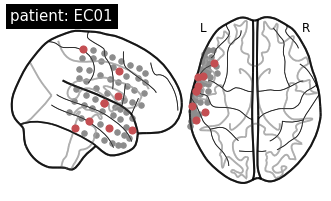

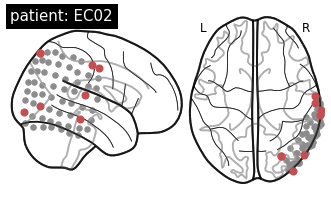

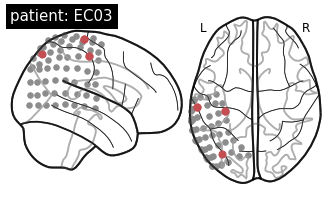

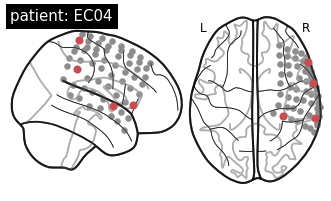

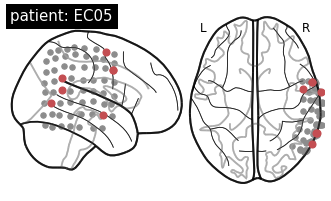

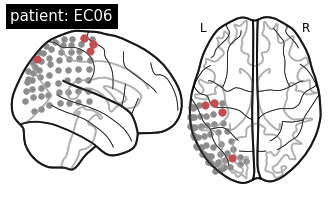

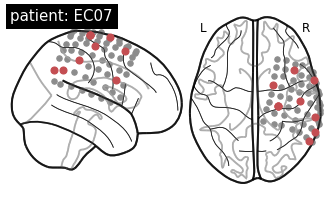

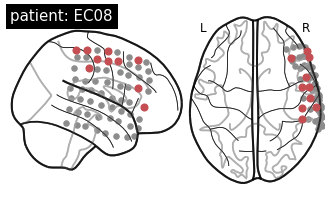

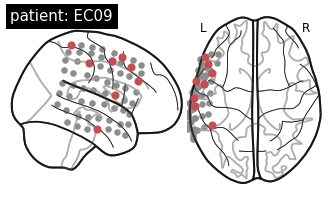

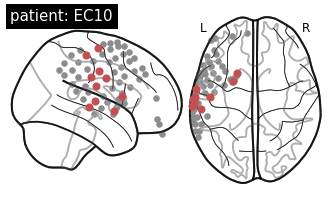

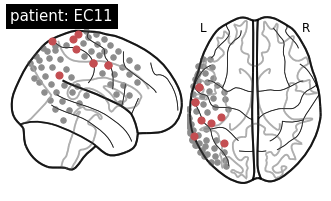

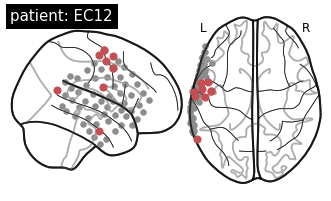

In [3]:
# PLOT SELECTED ELECTRODES
for i, pat_id in enumerate(pat_ids):
#for i, pat_id in enumerate(['EC01']):
    file = os.path.join(base_path, '..', '..', 'data', 'raw_data', 'naturalistic_move_v_rest',
                        'electrode_locations', 'ecog_metadata_{}.csv'.format(pat_ids[pat_id]))
    df = pd.read_csv(file)
    ch_names = df['Unnamed: 0'].values.tolist()
    elec = np.asarray([[x,y,z] for x,y,z in zip(df['X'], df['Y'], df['Z'])])

    selected_elecs = res_all[pat_id]['greedy'][2]
    elec_all = elec[:63, :]
    elec_selected = elec[selected_elecs,:]

    nl.plot_connectome(adjacency_matrix=np.eye(elec_all.shape[0]),
                   node_coords=elec_all,
                   node_size=30,
                   node_color=sns.color_palette('deep')[7],
                   title='patient: ' + pat_id,
                   figure=i,
                   display_mode='xz',
                   )
    nl.plot_connectome(adjacency_matrix=np.eye(elec_selected.shape[0]),
                       node_coords=elec_selected,
                       node_color=sns.color_palette('deep')[3],
                       node_size=50,
                       title='patient: ' + pat_id,
                       figure=i,
                       display_mode='xz',
                       #output_file=os.path.join(base_path, '..', '..', 'analysis', 'move_vs_rest', 'figs', 'greedy_selected', '{}.png'.format(pat_id))
                       )

In [4]:
# PLOT CHANNEL ACCURACIES

file = open(os.path.join(base_path, '..', '..', 'trained_models', 'svm', 'HTNet_data', 'single_features', 
                         'accs_all.pkl'), 'rb')
res_all = pickle.load(file)
file.close()

for i, pat_id in enumerate(pat_ids):
#for i, pat_id in enumerate(['EC07']):
    file = os.path.join(base_path, '..', '..', 'data', 'raw_data', 'naturalistic_move_v_rest', 
                       'electrode_locations', 'ecog_metadata_{}.csv'.format(pat_ids[pat_id]))
    df = pd.read_csv(file)
    ch_names = df['Unnamed: 0'].values.tolist()
    elec = np.asarray([[x,y,z] for x,y,z in zip(df['X'], df['Y'], df['Z'])])
    elec = elec[:64,:]

    weights = [res for res in res_all[pat_id]['all_features']['test']['result']]

    '''color = [[w, 0, 0, 1] for w in weights]
    while len(weights) < len(ch_names):
        color.append([0,0,0,1])
        weights.append(0)'''

    '''nl.plot_connectome(adjacency_matrix=np.eye(elec.shape[0]),
                       node_coords=elec,
                       node_color=weights[:64],
                       title=pat_id)'''
    '''nl.plot_connectome(adjacency_matrix=np.eye(elec.shape[0]),
                   node_coords=elec,
                   node_size=40,
                   alpha=.4,
                   display_mode='xz',
                   node_color='grey',
                   figure=2*i,
                   )'''
    
    # UNCOMMENT output_file TO SAVE RESULTS !!!!!!!!!!!!
    nl.plot_markers(#adjacency_matrix=np.eye(elec.shape[0]),
                node_coords=elec,
                node_values=weights[:64],
                node_size=30,
                display_mode='xz',
                alpha=1,
                #node_cmap='Spectral',
                #node_cmap=sns.color_palette("OrRd", as_cmap=True),
                node_cmap=sns.light_palette(sns.color_palette('deep')[3],
                                            n_colors=20,
                                            reverse=False, as_cmap=True,
                                            input='rgb'),
                figure=i,
                title='patient ID: '+pat_id,
                output_file=os.path.join(base_path, '..', '..', 'analysis', 'move_vs_rest', 'figs', 'single_ch_acc', 'single_{}.png'.format(pat_id)),
                colorbar=True,
    )
    

